In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
data = pd.read_csv("AggregatedData.csv")

<h3> Convert Weekday column to Uppercase because of format mismatch </h3>

In [3]:
data['Weekday'] = data['Weekday'].str.upper()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11589 entries, 0 to 11588
Data columns (total 12 columns):
ATM Name                        11589 non-null object
Transaction Date                11589 non-null object
No Of Withdrawals               11589 non-null int64
No Of XYZ Card Withdrawals      11589 non-null int64
No Of Other Card Withdrawals    11589 non-null int64
Total amount Withdrawn          11589 non-null int64
Amount withdrawn XYZ Card       11589 non-null int64
Amount withdrawn Other Card     11589 non-null int64
Weekday                         11589 non-null object
Festival Religion               11589 non-null object
Working Day                     11589 non-null object
Holiday Sequence                11589 non-null object
dtypes: int64(6), object(6)
memory usage: 1.1+ MB


<h3> Convert Transaction Date column to Date Time object </h3>

In [5]:
import datetime 
data['Transaction Date'] = pd.to_datetime(data['Transaction Date']) 

In [6]:
data.head()

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
0,Big Street ATM,2011-01-01,50,20,30,123800,41700,82100,SATURDAY,H,H,WHH
1,Mount Road ATM,2011-01-01,253,67,186,767900,270900,497000,SATURDAY,C,H,WHH
2,Airport ATM,2011-01-01,98,56,42,503400,347700,155700,SATURDAY,C,H,WHH
3,KK Nagar ATM,2011-01-01,265,159,106,945300,532600,412700,SATURDAY,C,H,WHH
4,Christ College ATM,2011-01-01,74,25,49,287700,148200,139500,SATURDAY,C,H,WHH


<h3> Removing the XYZ and Other Card Withdrawn Amounts columns too because I think they will end up biasing the model too much because the Total Amount Withdrawn column is just the sum of these two columns </h3>
<h4> Actually the number of withdrawals should be removed too, because in a real-time scenario, we cannot really have that value but I'm keeping it in for now </h4>

In [25]:
X = data.drop(['Total amount Withdrawn', 'Transaction Date', 'Amount withdrawn Other Card',
               'Amount withdrawn XYZ Card', 'No Of Withdrawals', 'No Of XYZ Card Withdrawals',
       'No Of Other Card Withdrawals'], axis = 1)

y = data['Total amount Withdrawn']

<h3> Converting Transaction Date to separate columns, otherwise model won't accept it </h3>


In [26]:
X['Month'] = data['Transaction Date'].dt.month
X['Day'] = data['Transaction Date'].dt.day
X['Year'] = data['Transaction Date'].dt.year

In [27]:
X.columns

Index(['ATM Name', 'Weekday', 'Festival Religion', 'Working Day',
       'Holiday Sequence', 'Month', 'Day', 'Year'],
      dtype='object')

<h3> Converting Categorical Columns to Boolean Columns using pd.get_dummies() </h3>

In [28]:
categorical_features_list = ['ATM Name', 'Weekday', 'Festival Religion', 'Working Day', 'Holiday Sequence', 'Month', 'Day', 'Year']
numeric_features_list = []

In [29]:
# Convert all categorical columns to Dummy Data (One-Hot Encoding I think)
# drop_first = True to avoid the first column of each dummy column's result
# So if column = Gender and has two unique values Male and Female, get_dummies on this column creates two new columns
# male and female, if person male that column is 1 and the other is 0 and same for female column, but we only just need
# one of these columns, male or female, if male is 0 it guarantees person is female, for that reason drop_first=True

numeric_data = pd.get_dummies(X, columns=categorical_features_list, drop_first=True)

In [30]:
numeric_data.head()

,ATM Name_Big Street ATM,ATM Name_Christ College ATM,ATM Name_KK Nagar ATM,ATM Name_Mount Road ATM,Weekday_MONDAY,Weekday_SATURDAY,Weekday_SUNDAY,Weekday_THURSDAY,Weekday_TUESDAY,Weekday_WEDNESDAY,...,Day_28,Day_29,Day_30,Day_31,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h3> Train Test Split followed by Scaling all Columns </h3>
<h3> Since all columns are non-numeric, we don't really need scaling, so I commented it out for now </h3>

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = numeric_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Note that we fit the scaler on X_train only and not X, otherwise test data will get biased on means and std of test data
# Instead it should use train data mean and std
# scaler = StandardScaler().fit(X_train)
# scaled_X_train = pd.DataFrame(data=scaler.transform(X_train), columns=X.columns)
# scaled_X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X.columns)

# scaled_X_train

,ATM Name_Big Street ATM,ATM Name_Christ College ATM,ATM Name_KK Nagar ATM,ATM Name_Mount Road ATM,Weekday_MONDAY,Weekday_SATURDAY,Weekday_SUNDAY,Weekday_THURSDAY,Weekday_TUESDAY,Weekday_WEDNESDAY,...,Day_28,Day_29,Day_30,Day_31,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017
0,-0.495103,1.954473,-0.510496,-0.496453,-0.378603,-0.405602,-0.553806,-0.367237,-0.388752,-0.380516,...,-0.188027,-0.186263,-0.173856,-0.14094,-0.43525,-0.424785,-0.426805,-0.426200,2.656240,-0.336248
1,-0.495103,1.954473,-0.510496,-0.496453,-0.378603,-0.405602,1.805687,-0.367237,-0.388752,-0.380516,...,-0.188027,-0.186263,-0.173856,-0.14094,-0.43525,-0.424785,-0.426805,2.346319,-0.376472,-0.336248
2,-0.495103,1.954473,-0.510496,-0.496453,-0.378603,-0.405602,-0.553806,-0.367237,-0.388752,2.628009,...,-0.188027,-0.186263,-0.173856,-0.14094,-0.43525,-0.424785,-0.426805,-0.426200,2.656240,-0.336248
3,-0.495103,-0.511647,-0.510496,-0.496453,-0.378603,-0.405602,-0.553806,-0.367237,2.572334,-0.380516,...,-0.188027,-0.186263,-0.173856,-0.14094,-0.43525,2.354132,-0.426805,-0.426200,-0.376472,-0.336248
4,2.019783,-0.511647,-0.510496,-0.496453,-0.378603,-0.405602,1.805687,-0.367237,-0.388752,-0.380516,...,-0.188027,-0.186263,-0.173856,-0.14094,-0.43525,-0.424785,-0.426805,-0.426200,-0.376472,-0.336248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8107,-0.495103,1.954473,-0.510496,-0.496453,-0.378603,2.465468,-0.553806,-0.367237,-0.388752,-0.380516,...,-0.188027,-0.186263,5.751872,-0.14094,-0.43525,-0.424785,-0.426805,-0.426200,-0.376472,-0.336248
8108,-0.495103,1.954473,-0.510496,-0.496453,-0.378603,-0.405602,-0.553806,-0.367237,2.572334,-0.380516,...,-0.188027,-0.186263,-0.173856,-0.14094,-0.43525,-0.424785,2.342990,-0.426200,-0.376472,-0.336248
8109,-0.495103,-0.511647,-0.510496,-0.496453,-0.378603,-0.405602,1.805687,-0.367237,-0.388752,-0.380516,...,-0.188027,-0.186263,-0.173856,-0.14094,-0.43525,-0.424785,-0.426805,2.346319,-0.376472,-0.336248
8110,-0.495103,-0.511647,-0.510496,2.014288,-0.378603,-0.405602,-0.553806,-0.367237,-0.388752,-0.380516,...,-0.188027,-0.186263,5.751872,-0.14094,-0.43525,-0.424785,-0.426805,-0.426200,-0.376472,-0.336248


<h3> KNN Implementation & Error Rate Visualization </h3>

In [31]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

error_rate = []
for k in range(1, 51):
    knn = KNeighborsRegressor(n_neighbors=k, n_jobs=-1)
    knn.fit(scaled_X_train, y_train)
    predictions = knn.predict(scaled_X_test)
    error_rate.append(np.sqrt(mean_squared_error(y_test, predictions)))
    print("k={} Model Trained and Tested".format(k))

k=1 Model Trained and Tested
k=2 Model Trained and Tested
k=3 Model Trained and Tested
k=4 Model Trained and Tested
k=5 Model Trained and Tested
k=6 Model Trained and Tested
k=7 Model Trained and Tested
k=8 Model Trained and Tested
k=9 Model Trained and Tested
k=10 Model Trained and Tested
k=11 Model Trained and Tested
k=12 Model Trained and Tested
k=13 Model Trained and Tested
k=14 Model Trained and Tested
k=15 Model Trained and Tested
k=16 Model Trained and Tested
k=17 Model Trained and Tested
k=18 Model Trained and Tested
k=19 Model Trained and Tested
k=20 Model Trained and Tested
k=21 Model Trained and Tested
k=22 Model Trained and Tested
k=23 Model Trained and Tested
k=24 Model Trained and Tested
k=25 Model Trained and Tested
k=26 Model Trained and Tested
k=27 Model Trained and Tested
k=28 Model Trained and Tested
k=29 Model Trained and Tested
k=30 Model Trained and Tested
k=31 Model Trained and Tested
k=32 Model Trained and Tested
k=33 Model Trained and Tested
k=34 Model Trained 

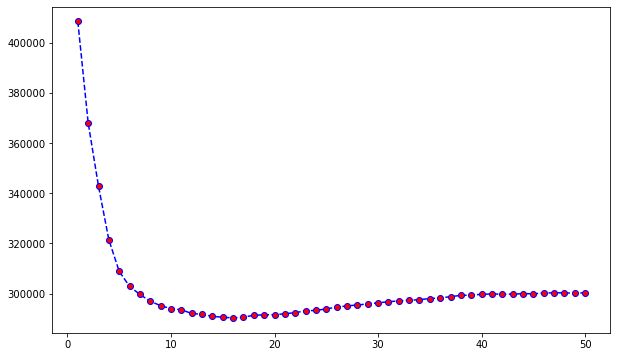

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(1,51), error_rate, linestyle='--', marker='o', markerfacecolor='red', color='blue')

In [23]:
print("Best K:", error_rate.index(min(error_rate)))
print("Best RMSE:", min(error_rate))

Best K: 15
Best RMSE: 290293.01096490346


<h3> Best RMSE: 290293.01096490346 </h3>

<h2> Linear Regression </h2>

In [39]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(n_jobs=-1)

lr.fit(X_train, y_train)

lr_predictions = lr.predict(X_test)

lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))

print(lr_rmse)

251419.81922358868


<h3> Linear Regression RMSE: 251419.81922358868 </h3>

<h2> Ridge Linear Regression </h2>

In [41]:
from sklearn.linear_model import Ridge

# Potential to use Hyperparameter Tuning with solvers, alpha
ridge_lr = Ridge()

ridge_lr.fit(X_train, y_train)

ridge_lr_predictions = ridge_lr.predict(X_test)

ridge_lr_rmse = np.sqrt(mean_squared_error(y_test, ridge_lr_predictions))

print(ridge_lr_rmse)

251386.47604234665


<h3> Ridge Linear Regression RMSE: 251386.47604234665 </h3>

<h2> Lasso Linear Regression </h2>

In [46]:
from sklearn.linear_model import Lasso

# Potential to use Hyperparameter Tuning with alpha
lasso_lr = Lasso(max_iter=1100)

lasso_lr.fit(X_train, y_train)

lasso_lr_predictions = lasso_lr.predict(X_test)

lasso_lr_rmse = np.sqrt(mean_squared_error(y_test, lasso_lr_predictions))

print(lasso_lr_rmse)
print(lasso_lr.n_iter_)

251415.86960634057
1091


<h3> Lasso Linear Regression RMSE: 251415.86960634057 </h3>

<h2> Bayesian Ridge Linear Regression </h2>

In [49]:
from sklearn.linear_model import BayesianRidge

# Lot of potential to use Hyperparameter Tuning with alpha_1, 2, lambda_1, lambda_2 
bayes_ridge_lr = BayesianRidge()

bayes_ridge_lr.fit(X_train, y_train)

bayes_ridge_lr_predictions = bayes_ridge_lr.predict(X_test)

bayes_ridge_lr_rmse = np.sqrt(mean_squared_error(y_test, bayes_ridge_lr_predictions))

print(bayes_ridge_lr_rmse)

251396.25827460986


<h3> Bayesian Ridge Linear Regression RMSE: 251396.25827460986 </h3>

<h2> Elasticnet Linear Regression </h2>

In [50]:
from sklearn.linear_model import ElasticNet

# Potential to use Hyperparameter Tuning with alpha and l1_ratio
enet_lr = ElasticNet()

enet_lr.fit(X_train, y_train)

enet_lr_predictions = enet_lr.predict(X_test)

enet_lr_rmse = np.sqrt(mean_squared_error(y_test, enet_lr_predictions))

print(enet_lr_rmse)

299840.48379522713


<h3> Elasticnet Linear Regression RMSE: 299840.48379522713 </h3>

<h2> Support Vector Regression </h2>

In [51]:
from sklearn.svm import SVR

# Potential to use Hyperparameter Tuning with kernel and C
svr = SVR()

svr.fit(X_train, y_train)

svr_predictions = svr.predict(X_test)

svr_rmse = np.sqrt(mean_squared_error(y_test, svr_predictions))

print(svr_rmse)

330051.3590919249


<h3> Support Vector Regression RMSE: 330051.3590919249 </h3>

<h2> Decision Tree Regression </h2>

In [81]:
from sklearn.tree import DecisionTreeRegressor

# Lord knows how to Hyperparameter this, so many features
dtree_reg = DecisionTreeRegressor()

dtree_reg.fit(X_train, y_train)

dtree_reg_predictions = dtree_reg.predict(X_test)

dtree_reg_rmse = np.sqrt(mean_squared_error(y_test, dtree_reg_predictions))

print(dtree_reg_rmse)

256151.41223658453


<h3> Decision Tree Regression RMSE: Varies with each execution but range from 255000 to 257000 </h3>

<h2> Random Forest Regression </h2>

In [87]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()

rf_reg.fit(X_train, y_train)

rf_reg_predictions = rf_reg.predict(X_test)

rf_reg_rmse = np.sqrt(mean_squared_error(y_test, rf_reg_predictions))

print(rf_reg_rmse)

206243.9991755321


<h3> Random Forest Regression RMSE: Varies with each execution but ranges from 205500 to 207200 </h3>

<h2> Running all models to get summary of all RMSEs </h2>

In [93]:
models = {'K-Nearest Neighbours': KNeighborsRegressor(n_neighbors=15, n_jobs=-1), 'Vanilla Linear Regression': LinearRegression(), 
          'Ridge Linear Regression': Ridge(), 'Elasticnet Linear Regression': ElasticNet(), 
          'Lasso Linear Regression': Lasso(max_iter=1100), 'Bayesian Ridge Linear Regression': BayesianRidge(), 
          'Support Vector Regression': SVR(), 'Random Forest Regression': RandomForestRegressor(), 
          'Decision Tree Regression': DecisionTreeRegressor()}

In [94]:
def compute_rmse_model_list(models):
    print("RMSEs for each model")
    for model_name in models:
        model = models[model_name]
        model.fit(X_train, y_train)
        model_predictions = model.predict(X_test)
        model_rmse = np.sqrt(mean_squared_error(y_test, model_predictions))
        print("{} : {}".format(model_name, model_rmse))

In [95]:
compute_rmse_model_list(models)

RMSEs for each model
K-Nearest Neighbours : 250864.9272479264
Vanilla Linear Regression : 251419.81922358868
Ridge Linear Regression : 251386.47604234665
Elasticnet Linear Regression : 299840.48379522713
Lasso Linear Regression : 251415.86960634057
Bayesian Ridge Linear Regression : 251396.25827460986
Support Vector Regression : 330051.3590919249
Random Forest Regression : 207871.0304184408
Decision Tree Regression : 258454.9711478099
